Preprocesamiento de imágenes
=========================

No entraremos en detalle de cómo funciona cada técnica sino que daremos un resumen del objetivo de cada una y un ejemplo de su aplicación. Las más comunes son:

<h3>Grayscale</h3>
Las imágenes en RGB son representadas como arreglos 3D, donde tenemos largo y ancho, y los canales de color respectivamente. Esto suele ser pesado de trabajar con algoritmos en tiempo real por lo que se requiere reducir la dimensionalidad de los datos, es por ello que se aplica una transformación a escala de grises donde solo tendremos una matrix $n$ x $m$ en lugar de $3$ x $n$ x $m$. Para el ojo humano esto representa una pérdida en la información, pero para las computadoras varía según la aplicación que se le quiera dar. 

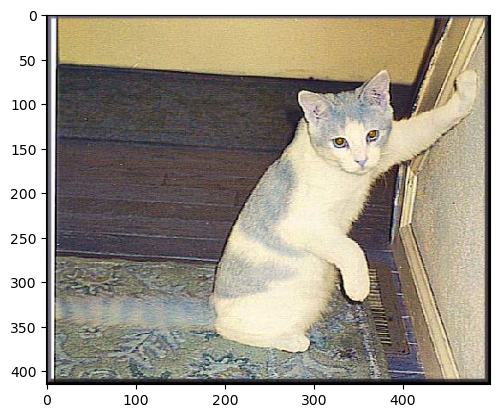

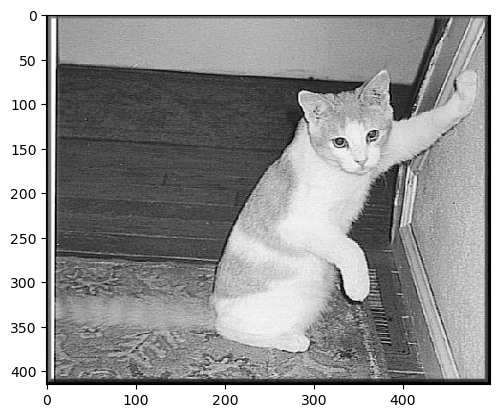

In [1]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('datasets/test_set/cats/cat.4001.jpg')
plt.imshow(image)
plt.show()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

<h3>Normalization</h3>
También conocido como reescalado, consiste en tomar limitar el nivel de brillo de cada pixel entre los valores 0 y 1. Esto se suele hacer cuando se aplican diferentes filtros y los valores que estén en la imagen son hasta negativos o sobrepasan 255. 

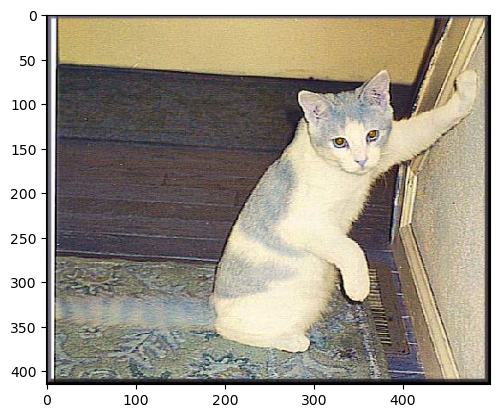

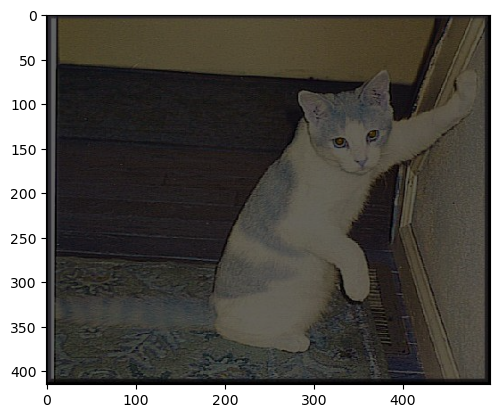

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('datasets/test_set/cats/cat.4001.jpg')
plt.imshow(image)
plt.show()

result = np.zeros(image.shape, dtype=image.dtype)
normalized = cv2.normalize(image, result, 0, 100, cv2.NORM_MINMAX)
plt.imshow(normalized)
plt.show()

<h3>Blur</h3>
Cuando las imágenes presentan ruido, es recomendable aplicar un suavizado que promedie de alguna manera los pixeles vecinos. El ruido puede ser peligroso para el detector de características y es vital eliminarlo.

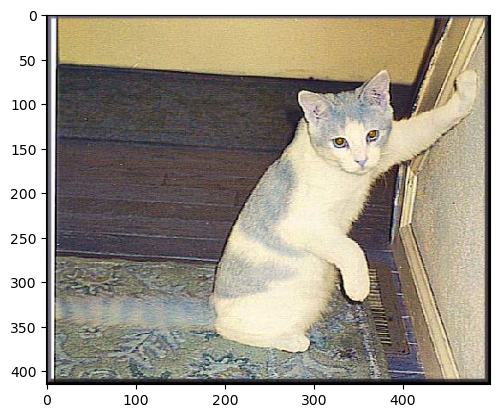

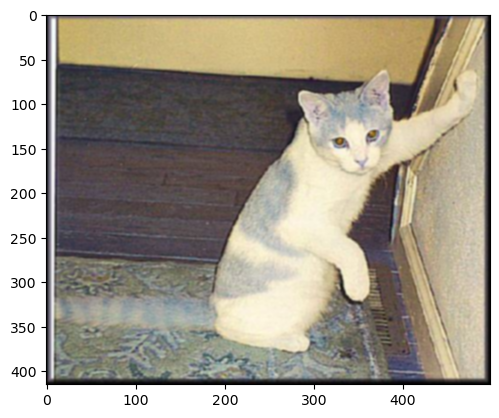

In [5]:
import cv2

image = cv2.imread('datasets/test_set/cats/cat.4001.jpg')
plt.imshow(image)
plt.show()

blurred = cv2.GaussianBlur(image, (5, 5), 0)
plt.imshow(blurred)
plt.show()


<h3>Edge detection</h3>
Es una técnica que permite detectar los bordes de una imagen, esto es útil para analizar la morfología y segmentar la imagen en objetos con el objetivo de realizar una clasificación. Las técnicas más comunes son Sobel, Canny, Laplacian y Prewitt.

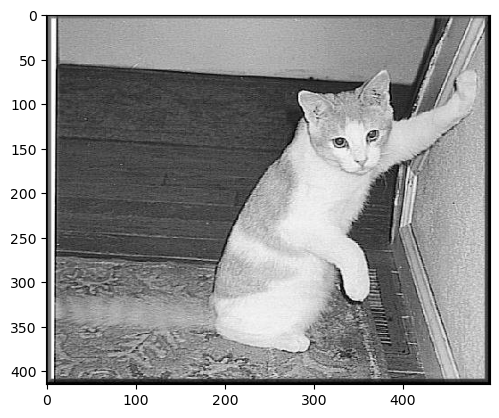

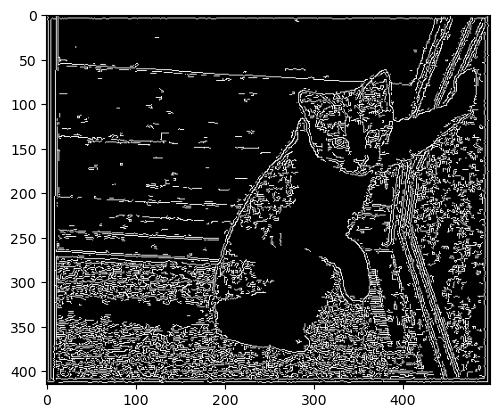

In [10]:
import cv2

image = cv2.imread('datasets/test_set/cats/cat.4001.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.show()

edges = cv2.Canny(image, 100, 200)
plt.imshow(edges, cmap='gray')
plt.show()

<h3>Segmentation</h3>
Es una técnica que permite fragmentar una imagen en objetos. Existen diferentes tipos de segmentación basadas en detección de bordes, umbrales, regiones, clustering y watershed; pero las más comunes por K-means y Watershed.

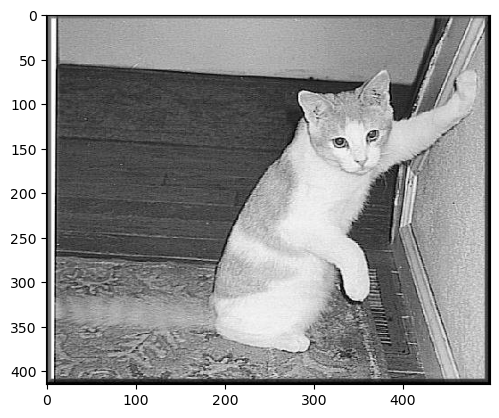

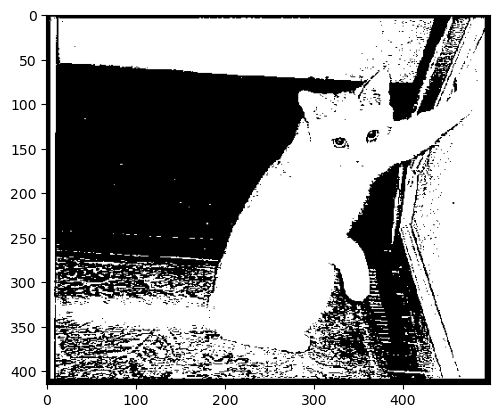

In [11]:
import cv2

image = cv2.imread('datasets/test_set/cats/cat.4001.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.show()

ret, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')
plt.show()

<h3>Convex hull</h3>
Es una técnica que permite encontrar el contorno de un objeto. Es el paso final de la segmentación y se utiliza para encontrar el área de un objeto.

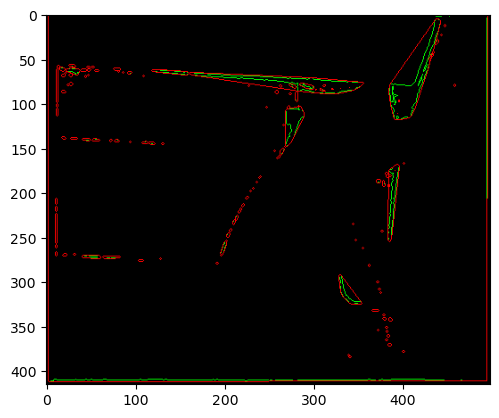

In [27]:
import cv2

image = cv2.imread('datasets/test_set/cats/cat.4001.jpg', cv2.IMREAD_GRAYSCALE)
blur = cv2.GaussianBlur(image, (5, 5), 0)
ret, thresh = cv2.threshold(blur, 50, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

hull = []
for i in range(len(contours)):
    hull.append(cv2.convexHull(contours[i], False))

drawing = np.zeros((thresh.shape[0], thresh.shape[1], 3), np.uint8)
for i in range(len(contours)):
    color_contours = (0, 255, 0)
    color = (255, 0, 0)
    cv2.drawContours(drawing, contours, i, color_contours, 1, 8, hierarchy)
    cv2.drawContours(drawing, hull, i, color, 1, 8)

plt.imshow(drawing)
plt.show()

<h3>Shifting</h3>
Para darle variedad al dataset, se suelen aplicar diferentes técnicas a las imágenes como lo es el desplazamiento, alguna rotación, invertirlas respecto a los ejes o cambiando el brillo; dando mayor diversidad en las imágenes y previniendo un overfitting.

<center>

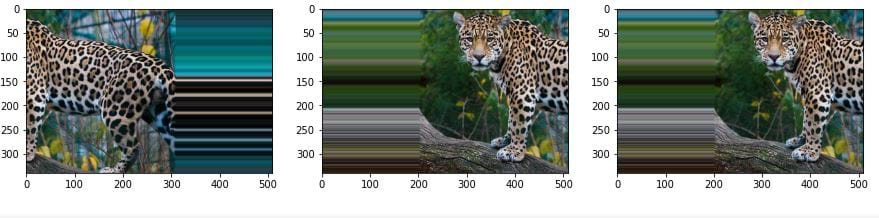

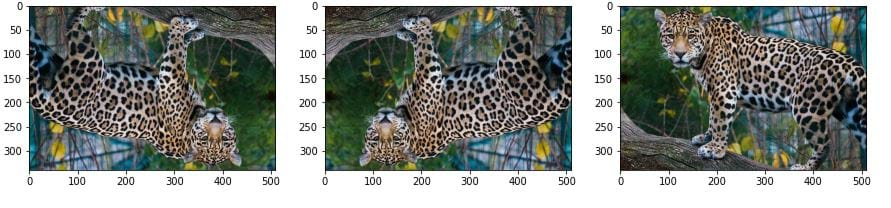

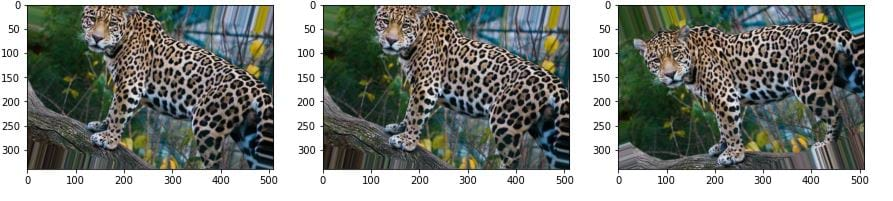

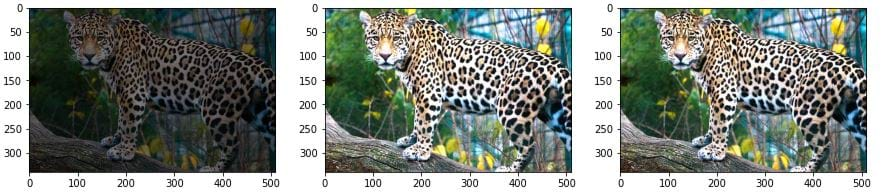

</center>

Referencias:

https://www.section.io/engineering-education/image-preprocessing-in-python/

https://datagen.tech/guides/image-annotation/image-segmentation/

https://blog.roboflow.com/why-preprocess-augment/